<div class="alert alert-block alert-success">
<h1>Sum of Squares</h1>
<h4>JANUARY 2014: PUZZLE</h4>
</div>

<img src="https://www.janestreet.com/puzzles/niedermaier1.png" width=720 height=50 />

The puzzle was publised at https://www.janestreet.com/puzzles/sum-of-squares-index/

Place a digit in each of the 25 spots in the below 5x5 grid, so that each 5-digit number (leading zeroes are ok) reading across and reading down is divisible by the number outside the grid, trying to maximize the sum of the 25 numbers you enter. An example of a completed grid with sum 100 is presented on the right.

Please submit your answer (along with any other comments you want to provide) as an ordered pair of your sum, and your 25 numbers, reading left to right, top to bottom.

Example submission: (100,1623552460048932486847030)

<div class="alert alert-block alert-warning">
    <h1>Break down the problem</h1>
</div>

This is a grid-based puzzle where you have a 5x5 grid, and the target is to fill each cell with a digit (0-9) to create 5-digit numbers reading across or reading down.

According to the example, 
* For the fifth row we have 5 values in order 4, 7, 0, 3, 0 creating a 5-digit number: 47,030
* For the first column we have 5 values in order 1, 5, 0, 2, 4 creating a 5-digit number: 15,024

The second requirement is that the 5-digit numbers that you formed have to be divisible by the repective numbers outside the grid. Take the example above,
* The 5-digit number at the fifth row is 47,030 has to be divisible by 5 => satisfied
* The 5-digit number at the first column is 15,024 has to be divisible by 6 => satisfied

<div class="alert alert-info">
  <h1>Solution</h1>
</div>

In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from z3 import *

### Z3 
Z3 is the most powerful solver I have found for such flexible systems of equations. Z3 is an excellent choice now that it is released under the MIT license.

If you are not familiar with Z3, you can start [here](https://github.com/Z3Prover/z3/wiki#background).

Z3 can be built using Visual Studio, a Makefile or using CMake. It provides bindings for several programming languages.

#### Otimization
Here's a basic example of solving an optimization problem using z3.optimize:

In this example, we're trying to **maximize** the objective function $$max(-x - 2y)$$ subject to the constraint $$x + y <= 10$$ The solver will find the optimal values of x and y that maximize the objective function while satisfying the given constraint. Adjust the objective function and constraints as needed for your specific optimization problem.

In [2]:
# Create a Z3 solver
opt = Optimize()

# Create integer variables for the optimization problem
x = Int('x')
y = Int('y')

# Define the objective function to maximize (e.g., -x - 2*y)
objective = -x - 2*y

# Add the objective function to the optimizer
opt.maximize(objective)

# Add constraints (e.g., x + y <= 10)
opt.add(x + y <= 10)

# Check for a solution
if opt.check() == sat: # return sat for satisfiable instances.
    model = opt.model()
    print('Optimal solution:')
    print('x =', model[x].as_long())
    print('y =', model[y].as_long())
    print('Objective value:', model.evaluate(objective).as_long())
else:
    print('No solution found.')

Optimal solution:
x = 0
y = 0
Objective value: 0


### Brainstorm

In [2]:
# Setup up a 5x5 matrix of integer variables and solver 
X = np.array(IntVector("x",25),dtype=object).reshape((5,5))
s = Optimize()

In [4]:
#maximise sum
s.maximize(Sum([x for _,x in np.ndenumerate(X)]))

In [5]:
# each cell contains a value in {0, ..., 9}
s += [And(x>=0,x<=9) for _,x in np.ndenumerate(X)]

In [6]:
#function to turn row/col to a 5-digit number
mult = lambda x:Sum([x[i] *10**((4)-i)  for i in range(5)]) 

For example, the number filling in the first row will be: 1, 6, 2, 3, and 5. In terms of the function, we obtain:
$$1*10^4 = 10,000$$
$$6*10^3 = 6,000$$
$$2*10^2 = 200$$
$$3*10^1 = 30$$
$$5*10^0 = 5$$

The number is $$10,000 + 6,000 + 200 + 30 + 5 = 16,235$$

In [7]:
# Rows
# The numbers outside the rows are respectively: 1, 2, 3, 4, 5
s += [mult(X[i,:]) % (i+1)==0 for i in range(5)]

In [8]:
# Cols
# The numbers outside the rows are respectively: 6, 7, 8, 9, 10
s += [mult(X[:,i]) % (i+6)==0 for i in range(5)] 

**Solved in 1.0787 seconds. Answer is : 205**

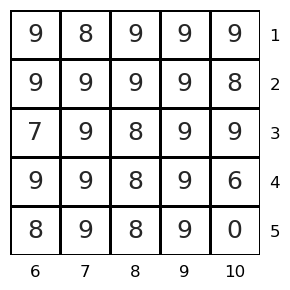

205 , 9899999998798999989689890


In [10]:
start = time.time()
# Solve and print 
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
else:
    print("Failed")
    
display(Markdown("**Solved in {:.4f} seconds. Answer is : {}**".format(time.time()-start,np.sum(r))))
fig,ax = plt.subplots(1,1,figsize=(3,3))
ax = sns.heatmap(np.zeros_like(r),annot=r,cbar=False,cmap="Greys",linecolor='k',linewidth=2,
                 xticklabels=[6,7,8,9,10], yticklabels=[1,2,3,4,5], annot_kws={"fontsize":18})
ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
plt.xticks(rotation=0,fontsize =12)
plt.yticks(rotation=0,fontsize =12)
plt.tight_layout()
plt.show()
fig.savefig('sum_of_squares_result.png')

print(np.sum(r),",","".join([str(x) for _,x in np.ndenumerate(r)]))

<div class="alert alert-info">
  <h1>Public Solution</h1>
</div>

<img src="https://www.janestreet.com/puzzles/Jan14_Solution.png" width=720 height=50 />

The BEST SOLUTION was publised at https://www.janestreet.com/puzzles/sum-of-squares-index/